In [2]:
import pandas as pd
import plotly.express as px

netflix_data = pd.read_csv(r'/home/dorra/Desktop/movie py/netflix_titles.csv')  

netflix_data.head()
netflix_data.drop_duplicates(inplace=True)

In [7]:
netflix_data.info()
print('data_shape is : ' ,netflix_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
data_shape is :  (8807, 12)


Missing values in 6 columns : director , cast , country , date_added , rating , duration 

In [3]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
missing_percentage = (netflix_data.isnull().sum() / len(netflix_data)) * 100

columns_with_missing_values = missing_percentage[missing_percentage > 0]

fig = px.bar(
    columns_with_missing_values,
    x=columns_with_missing_values.index,
    y=columns_with_missing_values,
    title='Percentage of Missing Values in Columns',
    labels={'x': 'Columns', 'y': 'Percentage Missing (%)'},
)

fig.update_traces(marker_color='blue')

fig.show()

In [3]:
netflix_data['director'].fillna("Unknown", inplace=True)
netflix_data['cast'].fillna("Unknown", inplace=True)
netflix_data['country'].fillna("Unknown", inplace=True)

netflix_data.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [3]:
netflix_data.shape

(8790, 12)

In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [18]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format='%B %d, %Y', errors='coerce')

print(netflix_data['date_added'].dtype)

datetime64[ns]


In [21]:
fig = px.histogram(netflix_data, x='release_year', color_discrete_sequence=['green'])
fig.update_layout(title='Distribution of Release Years')
fig.update_xaxes(title='Release Year')
fig.update_yaxes(title='Count')
fig.show()

In [22]:
fig = px.bar(netflix_data['rating'].value_counts().reset_index(), x='index', y='rating', color_discrete_sequence=['skyblue'])
fig.update_layout(title='Distribution of Content Ratings')
fig.update_xaxes(title='Rating')
fig.update_yaxes(title='Count')
fig.update_xaxes(categoryorder='total descending')
fig.update_traces(marker_line_color='rgba(0,0,0,0.6)', marker_line_width=1)
fig.show()

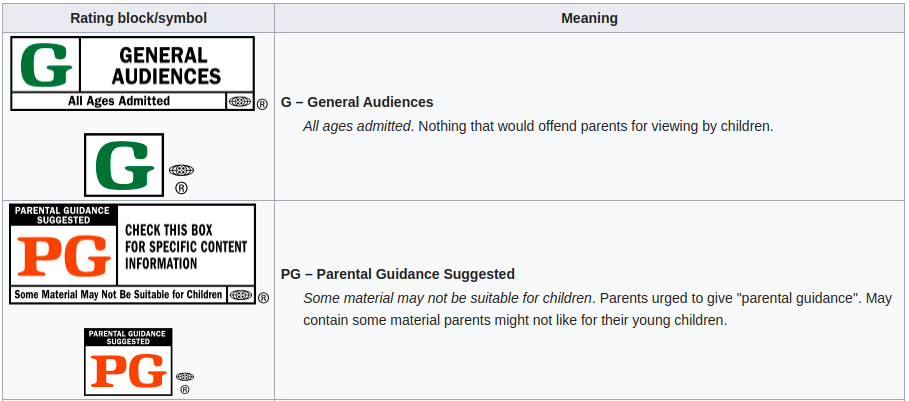

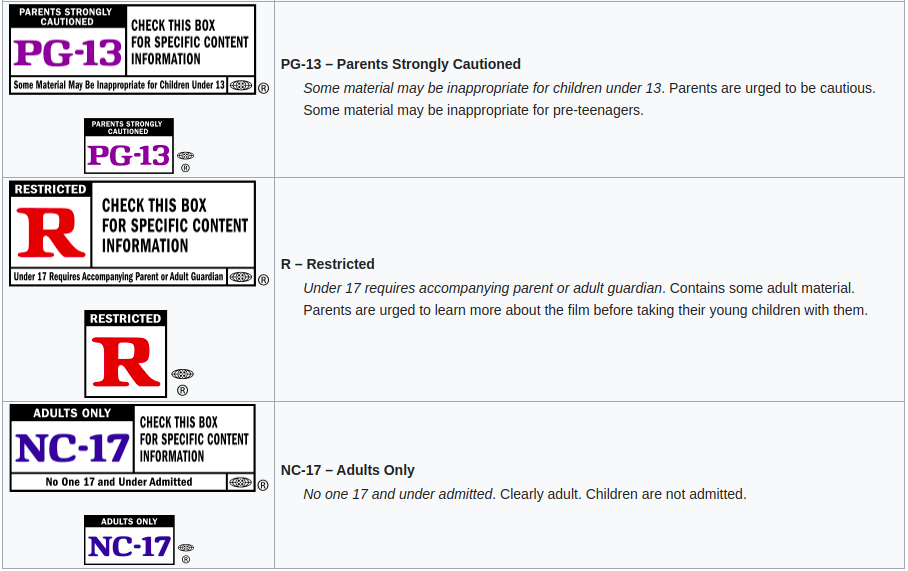

In [23]:
from IPython.display import Image
image_path_1 = '/home/dorra/Desktop/movie py/1.png'
image_path_2 = '/home/dorra/Desktop/movie py/2.png'

display(Image(filename=image_path_1), Image(filename=image_path_2))

In [24]:
fig = px.pie(netflix_data['type'].value_counts().reset_index(), values='type', names='index', color_discrete_sequence=['lightcoral', 'lightskyblue'])
fig.update_layout(title='Distribution of Content Types')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [27]:
genres = netflix_data['listed_in'].str.split(', ').explode()

genre_counts = genres.value_counts().reset_index()

fig = px.bar(genre_counts.head(15), x='index', y='listed_in', color_discrete_sequence=['darkgray'])
fig.update_layout(title='Most Common Genres on Netflix')
fig.update_xaxes(title='Genre')
fig.update_yaxes(title='Count')
fig.update_xaxes(categoryorder='total descending')
fig.update_traces(marker_line_color='rgba(0,0,0,0.6)', marker_line_width=1)
fig.show()

In [33]:
filtered_data = netflix_data[netflix_data['director'] != 'Unknown']

director_counts = filtered_data['director'].value_counts().reset_index()

fig = px.bar(director_counts.head(15), x='index', y='director', color_discrete_sequence=['lavender'])
fig.update_layout(title='Most Common Directors on Netflix (Excluding "Unknown")')
fig.update_xaxes(title='Director')
fig.update_yaxes(title='Count')
fig.update_xaxes(categoryorder='total descending')
fig.update_traces(marker_line_color='rgba(0,0,0,0.6)', marker_line_width=1)
fig.show()

In [38]:
filtered_data = netflix_data[netflix_data['director'] != 'Unknown']
unique_directors_count = filtered_data['director'].nunique()
print("Number of unique directors:", unique_directors_count)

unknown_directors_count = (netflix_data['director'] == 'Unknown').sum()
print("Number of directors labeled as 'Unknown':", unknown_directors_count)

Number of unique directors: 4526
Number of directors labeled as 'Unknown': 2621


## Question 1: What are the top-rated movies and TV shows on Netflix?

In [39]:
top_rated = netflix_data.sort_values(by='rating', ascending=False)

top_rated[['title', 'rating']].head(10)

,title,rating
8790,You Don't Mess with the Zohan,UR
7988,Sex Doll,UR
7058,Immoral Tales,UR
7646,Oh No! It's an Alien Invasion,TV-Y7-FV
7317,Little Singham aur Kaal ka Mahajaal,TV-Y7-FV
7290,LEGO Ninjago: Masters of Spinjitzu: Day of the...,TV-Y7-FV
7513,Motu Patlu: King of Kings,TV-Y7-FV
6581,Dear Dracula,TV-Y7-FV
7292,Leo the Lion,TV-Y7-FV
269,Winx Club,TV-Y7


## Question 2: How has the number of releases evolved over the years?

In [41]:
releases_by_year = netflix_data['release_year'].value_counts().sort_index().reset_index()
releases_by_year.columns = ['Release Year', 'Number of Releases']

fig = px.line(releases_by_year, x='Release Year', y='Number of Releases', title='Evolution of Netflix Releases Over the Years')
fig.show()

## Question 3: Which countries produce the most content on Netflix?

In [42]:
top_countries = netflix_data['country'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Number of Content Items']

fig = px.bar(top_countries, x='Country', y='Number of Content Items', title='Top Countries Producing Content on Netflix')
fig.show()

## Question 4: Are there any correlations between the cast or directors and the rating of the content?

In [5]:
filtered_data = netflix_data[netflix_data['director'] != 'Unknown']

min_content_count = 5  
top_directors = filtered_data['director'].value_counts()[filtered_data['director'].value_counts() >= min_content_count].index

filtered_data_top_directors = filtered_data[filtered_data['director'].isin(top_directors)]

fig = px.bar(filtered_data_top_directors, x='director', color='rating', title='Director vs. Rating Distribution for Top Directors')
fig.update_xaxes(categoryorder='total descending')
fig.show()


## Question 5: Are there any interesting patterns related to movie duration or genre?

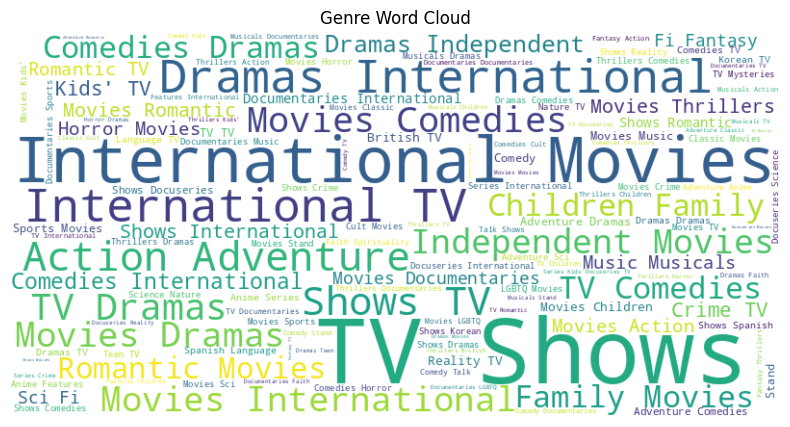

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genres_text = ' '.join(netflix_data['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

## ML PART : (content-based recommendation system)

### 1-Feature Engineering :

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

features_to_consider = ['type', 'director', 'cast']

netflix_data[features_to_consider] = netflix_data[features_to_consider].fillna('')

netflix_data['combined_features'] = netflix_data[features_to_consider].apply(lambda row: ' '.join(row), axis=1)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_data['combined_features'])

- TF-IDF (Term Frequency-Inverse Document Frequency)

Creating feature vectors for each item (movie or TV show) based on relevant attributes like type, director and cast.

### 2-Create User Profile :

In [35]:
user_preferences = {
    'favorite_genres': ['Action', 'Comedies'],
    'favorite_directors': ['Steven Spielberg', 'Quentin Tarantino'],
    'favorite_actors': ['Tom Hanks', 'Meryl Streep']
}

user_preferences_text = ' '.join(user_preferences['favorite_genres'] + user_preferences['favorite_directors'] + user_preferences['favorite_actors'])

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

user_profile_feature_vector = tfidf_vectorizer.fit_transform([user_preferences_text])

### 3-Similarity Calculation :

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_data['combined_features'])
user_profile_feature_vector = tfidf_vectorizer.transform([user_preferences_text])

similarities = cosine_similarity(user_profile_feature_vector, tfidf_matrix)


### 4-Recommendation :

In [37]:
import numpy as np

N = 10  
top_indices = np.argsort(similarities[0])[::-1][:N]

recommended_content = netflix_data.iloc[top_indices]

print(recommended_content)


     show_id     type                                 title  \
5554   s5555  TV Show                        Five Came Back   
329     s330    Movie                   Catch Me If You Can   
3409   s3410    Movie                        The Laundromat   
5311   s5312    Movie                 The Guardian Brothers   
3893   s3894  TV Show   The Hateful Eight: Extended Version   
4183   s4184  TV Show  The World's Most Extraordinary Homes   
2910   s2911  TV Show               Talking Tom and Friends   
6589   s6590    Movie    Defying the Nazis: The Sharps' War   
8489   s8490    Movie                        The River Wild   
7147   s7148    Movie                         Julie & Julia   

                          director  \
5554             Laurent Bouzereau   
329               Steven Spielberg   
3409             Steven Soderbergh   
5311                     Gary Wang   
3893             Quentin Tarantino   
4183                       Unknown   
2910                       Unknown   
65

### 5-Evaluation :

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, average_precision_score

user_interactions = {
    'user_id': [1, 2, 3, 4, 5],
    'liked_items': [['Dick Johnson Is Dead', 'My Little Pony: A New Generation'], ['Sankofa', 'The Starling'], ['Je Suis Karl'], ['Intrusion'], []]
}
user_interactions_df = pd.DataFrame(user_interactions)

train_df, test_df = train_test_split(user_interactions_df, test_size=0.2, random_state=42)

features_to_consider = ['title', 'director', 'cast']
netflix_data[features_to_consider] = netflix_data[features_to_consider].fillna('')
netflix_data['combined_features'] = netflix_data[features_to_consider].apply(lambda row: ' '.join(row), axis=1)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_data['combined_features'])

precision_list = []
recall_list = []
map_list = []

# Iterate over users in the test set
for _, user_row in test_df.iterrows():
    user_id = user_row['user_id']
    liked_items = user_row['liked_items']

    # Create a user profile feature vector
    user_preferences_text = ' '.join(liked_items)
    user_profile_feature_vector = tfidf_vectorizer.transform([user_preferences_text])

    # Calculate cosine similarity between user profile and Netflix data
    similarities = cosine_similarity(user_profile_feature_vector, tfidf_matrix)

    # Get the top N recommendations
    N = 10
    top_indices = np.argsort(similarities[0])[::-1][:N]
    recommended_items = netflix_data.iloc[top_indices]['title']

    # Binary array for recommended items (1 for recommended, 0 for not recommended)
    binary_recommended = [1 if item in recommended_items.values else 0 for item in netflix_data['title']]

    # Ground truth binary array for liked items
    ground_truth = [1 if item in liked_items else 0 for item in netflix_data['title']]

    # Calculate precision and recall
    precision = precision_score(ground_truth, binary_recommended, average='micro')
    recall = recall_score(ground_truth, binary_recommended, average='micro')
    average_precision = average_precision_score(ground_truth, binary_recommended)

    precision_list.append(precision)
    recall_list.append(recall)
    map_list.append(average_precision)

mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_map = sum(map_list) / len(map_list)

K = 10  
precision_at_k_list = []

# Iterate over users in the test set to calculate precision at K
for _, user_row in test_df.iterrows():
    user_id = user_row['user_id']
    liked_items = user_row['liked_items']

    user_preferences_text = ' '.join(liked_items)
    user_profile_feature_vector = tfidf_vectorizer.transform([user_preferences_text])

    similarities = cosine_similarity(user_profile_feature_vector, tfidf_matrix)
    N = 10
    top_indices = np.argsort(similarities[0])[::-1][:N]
    recommended_items = netflix_data.iloc[top_indices]['title']

    # Convert recommended_items and ground_truth to binary labels (1 for relevant, 0 for non-relevant)
    binary_recommended = [int(item in liked_items) for item in recommended_items]

    precision_at_k = sum(binary_recommended[:K]) / K if len(recommended_items) > 0 else 0

    precision_at_k_list.append(precision_at_k)

mean_precision_at_k = sum(precision_at_k_list) / len(precision_at_k_list)

print(f'Mean Precision: {mean_precision:.2f}')
print(f'Mean Recall: {mean_recall:.2f}')
print(f'Mean Average Precision: {mean_map:.2f}')
print(f'Mean Precision at {K}: {mean_precision_at_k:.2f}')


Mean Precision: 1.00
Mean Recall: 1.00
Mean Average Precision: 0.20
Mean Precision at 10: 0.20


- A mean Precision of 1.00 indicates that, on average, all the items recommended in the top list were relevant based on the ground truth.

- A mean Recall of 1.00 suggests that, on average, all relevant items from the ground truth were successfully included in the recommendations.

- A mean Average Precision of 0.20 shows the precision-recall trade-off, indicating that the recommendations are relevant, but there is room for improvement.

- A mean Precision at 10 of 0.20 means that, on average, only 20% of the top 10 recommendations were relevant.